In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import chardet

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#Get the encoding
def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

In [3]:
my_encoding = find_encoding('data/balanced-reviews.txt')
balanced = pd.read_csv('data/balanced-reviews.txt', encoding=my_encoding,sep = "\t")
balanced.head()

,no,Hotel name,rating,user type,room type,nights,review
0,2,فندق 72,2,مسافر منفرد,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,“ممتاز”. النظافة والطاقم متعاون.
1,3,فندق 72,5,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...
2,16,فندق 72,5,زوج,-,أقمت ليلتين,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...
3,20,فندق 72,1,زوج,غرفة قياسية مزدوجة,أقمت ليلة واحدة,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...
4,23,فندق 72,4,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلتين,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...


### Removing stopwords

In [4]:
#test analyse
from cltk.stop.arabic.stopword_filter import stopwords_filter as ar_stop_filter
balancedR=balanced["review"]
ar_stop_filter(balancedR[1])

['استثنائي', '.', 'سهولة', 'إنهاء', 'المعاملة', 'الاستقبال', '.', 'لاشيئ']

### 1. Getting negative reviews

In [5]:
balancedN=balanced.loc[balanced['rating'] <=2]#getting negative
balancedN['opinion']=0
negative=balancedN[['review','opinion']]
negative=negative.reset_index()
negative = negative.drop('index', 1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52849 entries, 0 to 52848
Data columns (total 2 columns):
review     52849 non-null object
opinion    52849 non-null int64
dtypes: int64(1), object(1)
memory usage: 825.8+ KB


In [7]:
negative

,review,opinion
0,“ممتاز”. النظافة والطاقم متعاون.,0
1,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...,0
2,“أسرة اماراتية.”. فندق مبنى على الطراز الحديث،...,0
3,“موظف المسبح سيء جدا”. . موظف المسبح سيء جدامع...,0
4,“اقامة ممتعة”. . الموقع والنظافة,0
5,ضعيف جداً. . لم اتوقع الانحدار الذي وصلته الكو...,0
6,“السعودية”. . تعملالموظفين,0
7,مخيب للأمل. اكثر الفنادق تقدر تسوي جك أوت السا...,0
8,“اقامة غير سعيدة لوجود قصور فالخدمة”. . مدخل ا...,0
9,مخيب للأمل. الموقع جيد. تعامل طاقم العمل سي وب...,0


### 2. Getting the positive reviews

In [8]:
balancedP=balanced.loc[balanced['rating'] >= 3]#getting positive
balancedP['opinion']=1
positive=balancedP[['review','opinion']]
positive=positive.reset_index()
positive = positive.drop('index', 1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52849 entries, 0 to 52848
Data columns (total 2 columns):
review     52849 non-null object
opinion    52849 non-null int64
dtypes: int64(1), object(1)
memory usage: 825.8+ KB


In [10]:
positive.head()

,review,opinion
0,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...,1
1,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...,1
2,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...,1
3,ممتاز. موقع الفندق ونظافته والاطلاله على البحر...,1
4,“جيدجداً”. الافطار جيد والسرير ممتاز ومريح واط...,1


### Merge the dataframes

In [116]:
frames = [positive,negative]
final = pd.concat(frames)

In [117]:
from sklearn.utils import shuffle
final = shuffle(final)

In [118]:
final.head()

,review,opinion
23455,ممتاز. قربه من الحرم- النظافة- الانترنت- المطع...,1
40993,“ابو فيصل الخارجيه”. اعجبني الفندق ومكانه الها...,1
44093,“موقع رائع ومطل على الحرم”. Location and frien...,1
4570,“جميرا قادمون”. روعه واحترام. لا شيء,1
13049,ضعيف جداً. . موظفين الاستقبال سيئين جداً يتصلو...,0


### Data preprocessing

In [119]:
X, y = (final['review'].values, final['opinion'].values)

In [120]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post')

### Split Data

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)

In [122]:
batch_size = 64
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]

In [123]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100
embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(200))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [124]:
RNN_Model=model.fit(X_train1,y_train1,validation_data=(X_valid,y_valid),batch_size=batch_size,epochs=5)

Train on 79209 samples, validate on 64 samples
Epoch 1/5
79209/79209 [==============================] - 272s 3ms/step - loss: 0.6933 - acc: 0.5100 - val_loss: 0.6905 - val_acc: 0.6094
Epoch 2/5
79209/79209 [==============================] - 301s 4ms/step - loss: 0.4062 - acc: 0.7776 - val_loss: 0.1621 - val_acc: 0.9531
Epoch 3/5
79209/79209 [==============================] - 306s 4ms/step - loss: 0.1424 - acc: 0.9506 - val_loss: 0.1697 - val_acc: 0.9219
Epoch 4/5
79209/79209 [==============================] - 319s 4ms/step - loss: 0.0925 - acc: 0.9702 - val_loss: 0.2054 - val_acc: 0.9375
Epoch 5/5
79209/79209 [==============================] - 306s 4ms/step - loss: 0.0613 - acc: 0.9814 - val_loss: 0.2118 - val_acc: 0.9531


In [125]:
scores=model.evaluate(X_test,y_test,verbose=0)
print("test acc= ",scores[1])

test acc=  0.9391863765373699


In [126]:
#prepare to check
lst1=[]
rev1=" معلومه سيئة"
rev2="السبسي مكروه جدا"
rev3="ملا هدرة، العرب كذبوا كبة وصدقوها...قالك جامعة دول عربية..اتفق العرب على الا يتفقوا"
rev4="و نعم الصديق"


lst1.append(rev1)
lst1.append(rev2)
lst1.append(rev3)
lst1.append(rev4)



df=pd.DataFrame(list(zip(lst1)),
              columns=['review'])
Check_set=df.review.values
Check_seq = tk.texts_to_sequences(Check_set)
Check_pad = pad_sequences(Check_seq, maxlen = 100, padding = 'post')
#predict opinion
check_predict=model.predict_classes(Check_pad,verbose=0)
# Prepare data frame
check_df = pd.DataFrame(list(zip(df.review.values, check_predict)))
check_df


,0,1
0,معلومه سيئة,[0]
1,السبسي مكروه جدا,[1]
2,ملا هدرة، العرب كذبوا كبة وصدقوها...قالك جامعة...,[1]
3,و نعم الصديق,[1]


# Les Commentaires : 

### <font color=' #ff3300'> Youssef Chahed : </font><br>

In [127]:
my_encoding_Comments = find_encoding('data/commentsYoutubeCandidatF.csv')
line     = []
expected = []
saw      = []     
cont     = True 

while cont == True:     
    try:
        data = pd.read_csv('data/commentsYoutubeCandidatF.csv',skiprows=line)
        cont = False
    except Exception as e:    
        errortype = e.message.split('.')[0].strip()                                
        if errortype == 'Error tokenizing data':                        
            cerror      = e.message.split(':')[1].strip().replace(',','')
            nums        = [n for n in cerror.split(' ') if str.isdigit(n)]
            expected.append(int(nums[0]))
            saw.append(int(nums[2]))
            line.append(int(nums[1])-1)
        else:
            cerror      = 'Unknown'
            print ('Unknown Error - 222')

In [128]:
data['candidat'].value_counts()

Beji Caied Essebssi     81
Youssef chahed          77
Mohsen Marzouk          68
Yacine Ayari            27
Sami dilou              23
Kamel Morjane           20
Yacine ibrahim          15
Said El Aidi            14
Neji Jalloul            13
Nourredine bhiri        12
Rached Ghannouchi       12
Mehdi Jomaa             10
Abir Moussi              6
Samia Abbou              6
Nouredine tabboubi       5
Rene trabelsi            4
Hamma hamami             3
Moncef marzouki          3
Walid jalled             2
Name: candidat, dtype: int64

In [131]:
Chahed=data[data['candidat'] == 'Youssef chahed ']

In [132]:
Chahed=Chahed.iloc[:,3].to_frame()

In [133]:
Chahed=Chahed.iloc[1:,:]

In [134]:
Check_set=Chahed.textDisplay.values
try: 
    Check_seq = tk.texts_to_sequences(str(Check_set))
    Check_pad = pad_sequences(Check_seq, maxlen = 100, padding = 'post')
    #predict opinion
    check_predict=model.predict_classes(Check_pad,verbose=0)
    # Prepare data frame
    check_df = pd.DataFrame(list(zip(Chahed.textDisplay.values, check_predict)) ,columns=['text', 'sentiment'])
    check_df
except Exception:
    pass

In [135]:
check_df.sentiment=check_df.iloc[:,1].apply(lambda x :x[0])

In [136]:
check_df['sentiment'] = pd.Categorical(check_df.sentiment)

In [137]:
check_df['sentiment'].value_counts()

0    60
1    16
Name: sentiment, dtype: int64

In [172]:
ChahedPositive=check_df['sentiment'].value_counts()[1]
ChahedNegative=check_df['sentiment'].value_counts()[0]

In [139]:
import seaborn as sns
sns.set(color_codes=True)

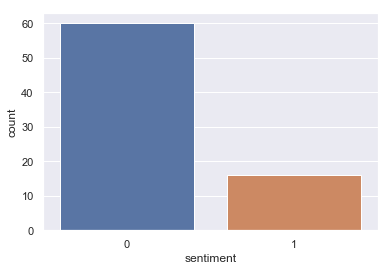

In [140]:
ax = sns.countplot(x="sentiment", data=check_df)

### <font color=' #ff3300'> Sebsi : </font><br>

In [141]:
def Analyse(data,politicien):
    p=data[data['candidat'] == str(politicien)]
    p=p.iloc[:,3].to_frame()
    Check_set=p.textDisplay.values
    try: 
        Check_seq = tk.texts_to_sequences(str(Check_set))
        Check_pad = pad_sequences(Check_seq, maxlen = 100, padding = 'post')
        #predict opinion
        check_predict=model.predict_classes(Check_pad,verbose=0)
        # Prepare data frame
        check_df = pd.DataFrame(list(zip(p.textDisplay.values, check_predict)) ,columns=['text', 'sentiment'])
        check_df
    except Exception:
        pass
    check_df.sentiment=check_df.iloc[:,1].apply(lambda x :x[0])
    check_df['sentiment'] = pd.Categorical(check_df.sentiment)
    return check_df

In [142]:
Sebsi=Analyse(data,"Beji Caied Essebssi ")

In [143]:
Sebsi['sentiment'].value_counts()

0    64
1    17
Name: sentiment, dtype: int64

In [144]:
SebsiPositive=Sebsi['sentiment'].value_counts()[1]
SebsiNegative=Sebsi['sentiment'].value_counts()[0]

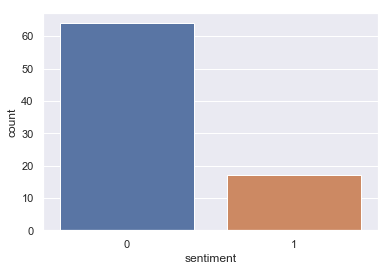

In [145]:
ax = sns.countplot(x="sentiment", data=Sebsi)

### <font color=' #ff3300'> Marzouk : </font><br>

In [146]:
Marzouk=Analyse(data,"Mohsen Marzouk ")   

In [147]:
Marzouk['sentiment'].value_counts()

0    48
1    20
Name: sentiment, dtype: int64

In [148]:
MarzoukPositive=Marzouk['sentiment'].value_counts()[1]
MarzoukNegative=Marzouk['sentiment'].value_counts()[0]

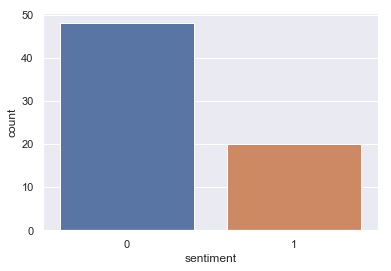

In [149]:
ax = sns.countplot(x="sentiment", data=Marzouk)

### <font color=' #ff3300'> Ayari : </font><br>

In [150]:
Ayari=Analyse(data,"Yacine Ayari ")  

In [151]:
Ayari['sentiment'].value_counts()

0    16
1    11
Name: sentiment, dtype: int64

In [152]:
AyariPositive=Ayari['sentiment'].value_counts()[1]
AyariNegative=Ayari['sentiment'].value_counts()[0]

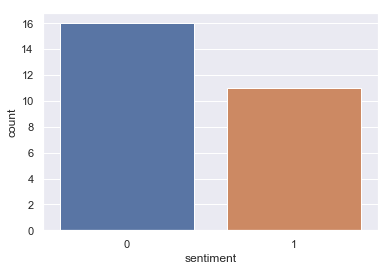

In [153]:
ax = sns.countplot(x="sentiment", data=Ayari)

### <font color=' #ff3300'> Dilo : </font><br>

In [154]:
dilou=Analyse(data,"Sami dilou ")  

In [155]:
dilou['sentiment'].value_counts()

0    21
1     2
Name: sentiment, dtype: int64

In [156]:
dilouPositive=dilou['sentiment'].value_counts()[1]
dilouNegative=dilou['sentiment'].value_counts()[0]

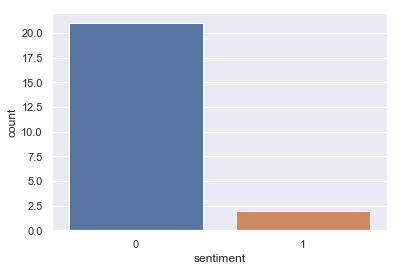

In [157]:
ax = sns.countplot(x="sentiment", data=dilou)

### <font color=' #ff3300'> Kamel Morjane : </font><br>

In [158]:
Morjane=Analyse(data,"Kamel Morjane ") 

In [159]:
Morjane['sentiment'].value_counts()

0    16
1     4
Name: sentiment, dtype: int64

In [160]:
MorjanePositive=Morjane['sentiment'].value_counts()[1]
MorjaneNegative=Morjane['sentiment'].value_counts()[0]

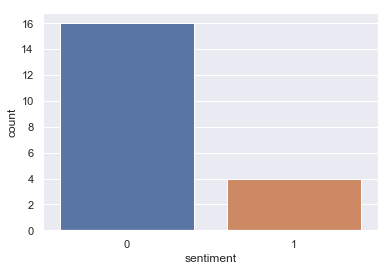

In [161]:
ax = sns.countplot(x="sentiment", data=Morjane)

### <font color=' #ff3300'> Yacine Ibrahim : </font><br>

In [165]:
Yacine_ibrahim =Analyse(data,"Yacine ibrahim") 

In [166]:
Yacine_ibrahim['sentiment'].value_counts()

0    11
1     4
Name: sentiment, dtype: int64

In [168]:
Yacine_ibrahim['sentiment'].value_counts()

0    11
1     4
Name: sentiment, dtype: int64

In [169]:
Yacine_ibrahimPositive=Yacine_ibrahim['sentiment'].value_counts()[1]
Yacine_ibrahimNegative=Yacine_ibrahim['sentiment'].value_counts()[0]

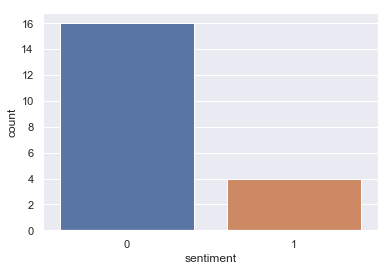

In [170]:
ax = sns.countplot(x="sentiment", data=Morjane)

In [173]:
Report_Final= [ ("Chahed",ChahedPositive ,ChahedNegative) ,
             ("Sebsi",SebsiPositive ,SebsiPositive) ,
             ("Marzouk",MarzoukPositive ,MarzoukNegative) ,
             ("Ayari",AyariPositive ,AyarikNegative) ,
              ("Dilo",dilouPositive ,dilouNegative) ,
               ("Morjane",MorjanePositive ,MorjaneNegative) ,
               ("Ibrahim",Yacine_ibrahimPositive ,Yacine_ibrahimNegative)
              ]

In [175]:
Final = pd.DataFrame(Report_Final, columns = ['Politicien' , 'Polarité_Positive', 'Polarité_Négative'])

In [176]:
Final.head()

,Politicien,Polarité_Positive,Polarité_Négative
0,Chahed,16,60
1,Sebsi,17,17
2,Marzouk,20,48
3,Ayari,11,2
4,Dilo,2,21


In [178]:
Final.to_csv("data/Polarité_Politique.csv", sep='\t', encoding='utf-8')

# 2. Analyse sentimentals de quelques Tweets

In [109]:
Tweet=pd.read_csv("data/tweetspolitics.csv")

In [110]:
Tweet.head()

,Unnamed: 0,timestamp,sn,text
0,0,2019-05-09 14:02:37,GnetTunisie,#Tunisie 🇹🇳#YoussefChahed promet une couvertur...
1,1,2019-05-09 12:04:40,ZiedToons,#Tunisie: #YoussefChahed annonce un projet de ...
2,2,2019-05-08 12:37:38,kcufoglu,#Anas is a #young #man from #Tunisia. He was #...
3,3,2019-05-08 12:19:42,kcufoglu,"#Anas, a #young man from #Tunisia, was sentenc..."
4,4,2019-05-03 11:50:47,LakhdarJalel,RT @BusinessNews_tn: #FatmaMseddi : #YoussefCh...


In [116]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from textblob import Blobber

In [122]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
blob1 = tb(u"Quelle mauvaise matinée")
blob1.sentiment[0]

-0.71

In [123]:
SentimentTweet=[]
for index, row in Tweet.iterrows():
    blob = tb(row['text'])
    SentimentTweet.append(blob.sentiment[0])

In [125]:
Tweet["Sentiement"]=SentimentTweet

In [126]:
Tweet

,Unnamed: 0,timestamp,sn,text,Sentiement
0,0,2019-05-09 14:02:37,GnetTunisie,#Tunisie 🇹🇳#YoussefChahed promet une couvertur...,0.250
1,1,2019-05-09 12:04:40,ZiedToons,#Tunisie: #YoussefChahed annonce un projet de ...,0.000
2,2,2019-05-08 12:37:38,kcufoglu,#Anas is a #young #man from #Tunisia. He was #...,0.000
3,3,2019-05-08 12:19:42,kcufoglu,"#Anas, a #young man from #Tunisia, was sentenc...",0.000
4,4,2019-05-03 11:50:47,LakhdarJalel,RT @BusinessNews_tn: #FatmaMseddi : #YoussefCh...,0.000
5,5,2019-05-03 11:30:36,BusinessNews_tn,#FatmaMseddi : #YoussefChahed doit démissionne...,0.000
6,6,2019-05-02 15:28:48,LeDiplomateTn,Tunisie : lancement officiel du parti Tahya To...,-0.050
7,7,2019-05-02 12:14:16,LaPresseTunisie,#YoussefChahed à la clôture du congrès de #Tah...,0.150
8,8,2019-05-02 03:45:34,SalibaJes,Tunisia raises minimum wage https://t.co/9giQu...,0.000
9,9,2019-04-30 07:59:54,KloufiKharnane,RT @judchrisis: La fermeture de la chaîne #Nes...,0.000


### Deploiement

In [127]:
import pickle
#serializing our model to a file called model.pkl
pickle.dump(RNN_Model, open("model.pkl","wb"), protocol=2)

In [131]:
#loading a model from a file called model.pkl
with open('model.pkl', 'rb') as f:
    model2 = pickle.load(f)